## Algorithm Introduction: Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a classical **unsupervised learning**
technique for **dimensionality reduction**.  
The goal of PCA is to transform a high-dimensional dataset into a lower-dimensional
representation while preserving as much of the original data variance as possible.

PCA is widely used for:
- Reducing dimensionality before applying supervised learning algorithms
- Removing redundancy caused by correlated features
- Data visualization in 2D or 3D
- Noise reduction and feature extraction


### Intuition

In many real-world datasets, features are often highly correlated.
Although the data may lie in a high-dimensional space, its **intrinsic structure**
often resides in a much lower-dimensional subspace.

PCA identifies a new set of orthogonal axes, called **principal components**,
such that:
- The first principal component (PC1) captures the maximum variance in the data
- Each subsequent component captures the maximum remaining variance
  subject to being orthogonal to all previous components

By projecting the data onto the first few principal components, PCA achieves
dimensionality reduction with minimal information loss.


### Mathematical Formulation

Let the dataset be represented by a matrix  

$$\large X \in \mathbb{R}^{n \times d}$$

where $\large n$ is the number of samples and $\large d$ is the number of features.

#### Step 1: Data Centering
The data is first centered by subtracting the empirical mean:

$$\large \tilde{X} = X - \mu$$

#### Step 2: Covariance Matrix
The covariance matrix of the centered data is computed as:

$$\large \Sigma = \frac{1}{n-1} \tilde{X}^\top \tilde{X}$$
#### Step 3: Eigen-Decomposition
PCA performs eigen-decomposition of the covariance matrix:

$$\large \Sigma v_i = \lambda_i v_i$$

where:
- $\large v_i$ are the eigenvectors (principal directions)
- $\large \lambda_i$ are the eigenvalues (variance explained)

#### Step 4: Projection
Selecting the top $\large k$ eigenvectors, the data is projected as:

$$\large Z = \tilde{X} V_k$$

where $\large Z \in \mathbb{R}^{n \times k}$ is the reduced representation.


### Explained Variance

Each eigenvalue $\large \lambda_i$ represents the amount of variance captured by
the corresponding principal component.

The explained variance ratio is defined as:

$$\large \text{Explained Variance Ratio}_i =
\frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}$$


This quantity measures the proportion of total variance preserved by each
principal component and is commonly used to determine the number of components
to retain.


### Implementation Notes

In this notebook, PCA is implemented **from scratch using NumPy**, without
relying on scikit-learn's PCA module.  
The implementation follows these steps:
1. Feature standardization
2. Covariance matrix computation
3. Eigen-decomposition
4. Sorting eigenvalues in descending order
5. Projection onto the leading principal components

This implementation closely mirrors the mathematical definition of PCA and
highlights its linear algebra foundation.


## Data Loading and Preprocessing

In this notebook, we use a real-world dataset downloaded from Kaggle and stored
locally as a CSV file.

The dataset contains multiple numerical features describing observations in a
high-dimensional space. Since PCA is an **unsupervised learning** method, no
label information is required for model fitting. If a label column exists, it
will only be used later for visualization or interpretation purposes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rice_ml.pca import PCA

df = pd.read_csv("D:/研究生/机器学习/INDE-577/ml_project/examples/data/pca_data.csv")
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Feature Selection

PCA operates only on numerical features.  
If the dataset contains non-numeric columns (e.g., identifiers or labels),
they are excluded from the feature matrix.


In [2]:
# Keep only numerical columns
X = df.select_dtypes(include=[np.number])

print("Feature matrix shape:", X.shape)
X.head()


Feature matrix shape: (569, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Feature Standardization

PCA is sensitive to the scale of input features.
Therefore, all features are standardized to have zero mean and unit variance
before applying PCA.


In [6]:
# Remove zero-variance features
non_zero_std_cols = X_std[X_std > 0].index
X_filtered = X[non_zero_std_cols]

print("Original feature count:", X.shape[1])
print("After removing zero-variance features:", X_filtered.shape[1])

X_mean = X_filtered.mean(axis=0)
X_std = X_filtered.std(axis=0)

X_scaled = (X_filtered - X_mean) / X_std

print("Mean (first 5 features):")
print(X_scaled.mean().head())

print("\nStandard deviation (first 5 features):")
print(X_scaled.std().head())
print("Any NaN:", np.isnan(X_scaled.values).any())
print("Any Inf:", np.isinf(X_scaled.values).any())



Original feature count: 32
After removing zero-variance features: 31
Mean (first 5 features):
id                1.873136e-17
radius_mean      -1.311195e-16
texture_mean      6.243785e-17
perimeter_mean   -1.248757e-16
area_mean        -2.185325e-16
dtype: float64

Standard deviation (first 5 features):
id                1.0
radius_mean       1.0
texture_mean      1.0
perimeter_mean    1.0
area_mean         1.0
dtype: float64
Any NaN: False
Any Inf: False


## Applying Principal Component Analysis

After standardizing the feature matrix, PCA is applied to project the data
onto a lower-dimensional subspace. In this notebook, we first examine how
much variance is preserved by the leading principal components.


In [7]:
# Fit PCA keeping all components
pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)

explained_ratio = pca_full.explained_variance_ratio_

print("Explained variance ratio (first 10 components):")
for i, ratio in enumerate(explained_ratio[:10], start=1):
    print(f"PC{i}: {ratio:.4f}")

print("\nTotal explained variance:", explained_ratio.sum())


Explained variance ratio (first 10 components):
PC1: 0.4286
PC2: 0.1838
PC3: 0.0915
PC4: 0.0639
PC5: 0.0532
PC6: 0.0398
PC7: 0.0316
PC8: 0.0217
PC9: 0.0149
PC10: 0.0130

Total explained variance: 1.0000000000000002


### Scree Plot

The scree plot visualizes the proportion of variance explained by each
principal component. It is commonly used to determine the appropriate
number of components to retain.


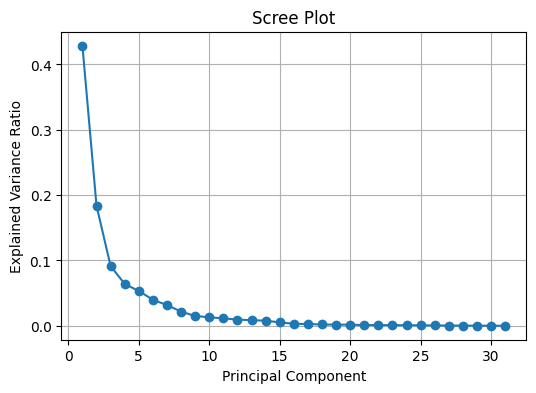

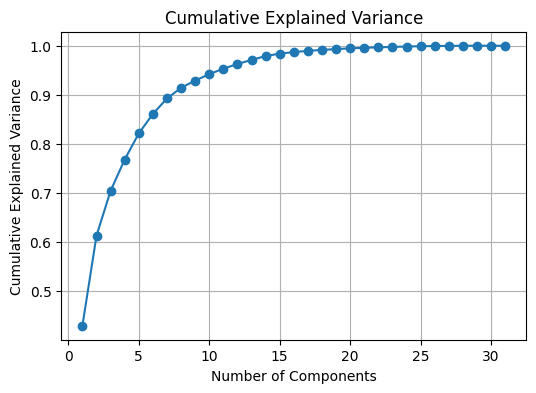

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(
    range(1, len(explained_ratio) + 1),
    explained_ratio,
    marker="o"
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(explained_ratio)

plt.figure(figsize=(6, 4))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker="o"
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.grid(True)
plt.show()


### Scree Plot Interpretation

The scree plot shows a sharp drop in explained variance from the first to the
second principal component, followed by a gradually decreasing tail.

- The first principal component (PC1) explains approximately 43% of the total variance.
- The second principal component (PC2) explains about 18% of the variance.
- Subsequent components each contribute progressively smaller amounts of variance.

This pattern indicates strong correlations among the original features and
suggests that a small number of principal components can capture most of the
informative structure of the data.

### Cumulative Explained Variance Interpretation

The cumulative explained variance plot shows how the total variance increases
as more principal components are included.

- The first two components together explain over 60% of the total variance.
- Approximately 5 components preserve more than 80% of the variance.
- Around 10 components are sufficient to retain over 95% of the variance.

Beyond this point, adding more components yields diminishing returns, as each
additional component contributes very little new information.


## PCA 2D Visualization

To further understand the structure of the data after dimensionality reduction,
we visualize the dataset projected onto the first two principal components.
Although PCA is an unsupervised method and does not use label information during
training, the diagnosis labels are used here solely for visualization purposes.


2D PCA shape: (569, 2)


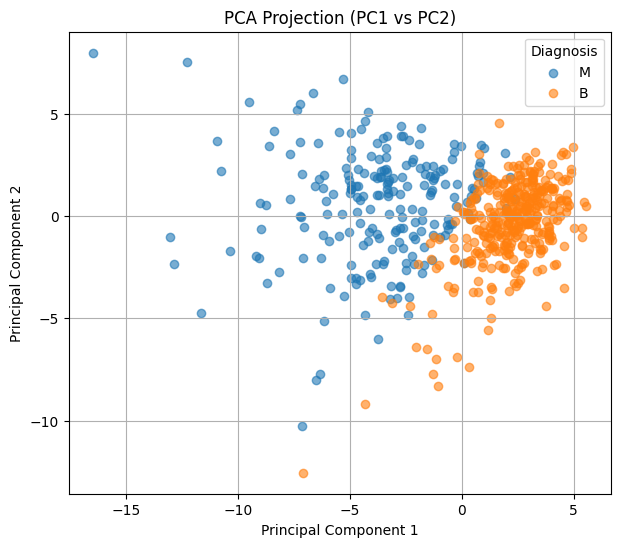

In [9]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("2D PCA shape:", X_pca_2d.shape)

labels = df["diagnosis"]

plt.figure(figsize=(7, 6))

for label, marker, color in zip(["M", "B"], ["o", "s"], ["red", "blue"]):
    idx = labels == label
    plt.scatter(
        X_pca_2d[idx, 0],
        X_pca_2d[idx, 1],
        label=label,
        alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (PC1 vs PC2)")
plt.legend(title="Diagnosis")
plt.grid(True)
plt.show()


### Interpretation of PCA 2D Projection

The scatter plot shows the data projected onto the first two principal
components, which together explain over 60% of the total variance.

Several important observations can be made:

- The data exhibits a clear separation trend along the first principal component.
- Malignant (M) and Benign (B) samples form two partially separated clusters,
  even though the diagnosis labels were not used during PCA fitting.
- This indicates that the dominant sources of variance captured by PCA
  are strongly associated with clinically meaningful characteristics.

Although some overlap remains, the overall structure suggests that the original
high-dimensional feature space can be effectively summarized by a small number
of principal components.


## Final Summary & Key Takeaways

- PCA was implemented from scratch using NumPy and applied to a real-world
  Kaggle dataset.
- After removing zero-variance features and standardizing the data,
  PCA successfully reduced the original 31-dimensional feature space.
- The first few principal components captured the majority of the data variance,
  with the first two components explaining over 60%.
- A 2D PCA projection revealed a clear structural separation between malignant
  and benign samples, despite PCA being an unsupervised method.
- This demonstrates the effectiveness of PCA for dimensionality reduction,
  feature extraction, and exploratory data analysis.
